In [24]:
import os
import torch
from PIL import Image
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms, utils
import matplotlib.pyplot as plt

In [25]:
class OneImage(Dataset):

    def __init__(self,file_name, root_dir, transform=None):
        """
        Args:
            file_name (string): Name of the only image file.
            root_dir (string): Directory with the image.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,file_name)
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image
    
    
crop_size = 64



## Set of transforms

In [26]:
sigma = 0.05
transformer = transforms.Compose([
            transforms.RandomCrop((crop_size,crop_size)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.ToTensor(),
            transforms.Lambda(lambda x : x + sigma*torch.randn_like(x))])

In [27]:
root_dir = "./data/"
file_name = "airport.jpg"

dataset = OneImage(file_name = file_name,
                   root_dir = root_dir,
                   transform = transformer)

In [28]:
dataloader = DataLoader(
            dataset,
            batch_size = 1,
            num_workers = 1, 
            shuffle = True
        )

In [29]:
samples_size = 16
samples = []
toPIL = transforms.ToPILImage()

for k_iter in range(samples_size):
    for batch_idx,img in enumerate(dataloader):
        shape = img.shape
        samples.append(toPIL(img[0]))

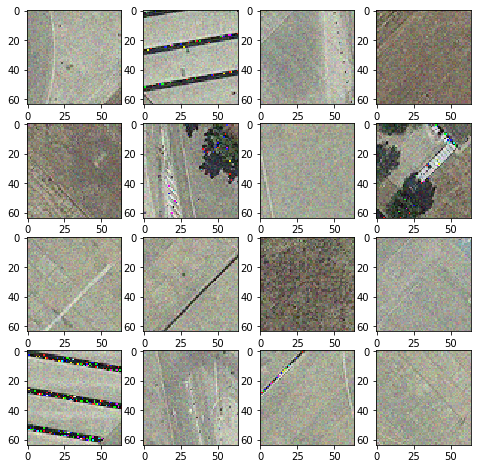

In [30]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = samples[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()